<a href="https://colab.research.google.com/github/myrondza/Data-Science-Machine-Learning-Deep-Learning-AI-Guide-Algorithms/blob/master/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [0]:
start = dt.datetime(2007, 1, 1)
end = dt.datetime.now()

In [0]:
df = web.DataReader("GOOGL", 'yahoo', start, end)

In [0]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,238.568573,230.785782,233.233231,234.029022,15397500.0,234.029022
2007-01-04,242.217224,234.409409,234.734741,241.871872,15759400.0,241.871872
2007-01-05,243.993988,239.294296,241.491486,243.838837,13730400.0,243.838837
2007-01-08,245.180176,241.341339,244.089096,242.032028,9499200.0,242.032028
2007-01-09,244.369370,240.840836,242.967972,242.992996,10752000.0,242.992996


In [0]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-28,1082.800049,1073.800049,1077.229980,1082.800049,1683600.0,1082.800049
2019-07-01,1108.589966,1095.329956,1101.040039,1100.000000,1459800.0,1100.000000
2019-07-02,1112.890015,1099.670044,1104.829956,1112.599976,1031500.0,1112.599976
2019-07-03,1127.989990,1114.849976,1118.500000,1122.989990,1007700.0,1122.989990
2019-07-05,1134.650024,1117.500000,1119.369995,1132.670044,1489200.0,1132.670044


In [0]:
df = df[["Close"]]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3148 entries, 2007-01-03 to 2019-07-05
Data columns (total 1 columns):
Close    3148 non-null float64
dtypes: float64(1)
memory usage: 49.2 KB


## GARCH (Generalized Autoregressive Conditional Heteroskedasticity)

In [0]:
import pyflux as pf
df = web.DataReader("NVDA", 'yahoo', start, end)
df = df[["Close"]]

In [0]:
model = pf.GARCH(df,p=1,q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Close                               Method: MLE                                       
Start Date: 2007-01-04 00:00:00                         Log Likelihood: -11217.772                        
End Date: 2019-07-05 00:00:00                           AIC: 22443.544                                    
Number of observations: 3147                            BIC: 22467.7608                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.4641                                                           
q(1)                                 

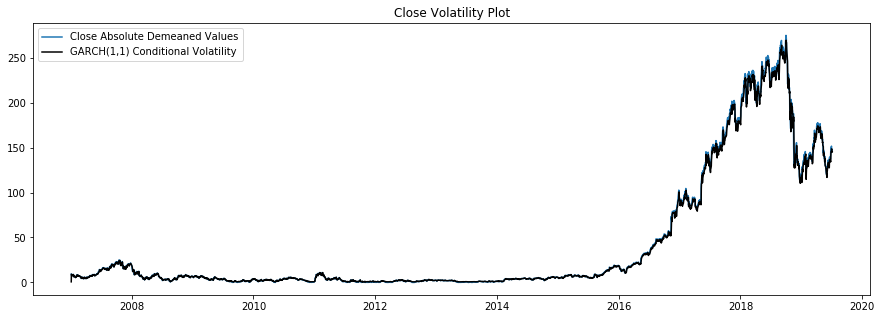

In [0]:
model.plot_fit(figsize=(15,5))

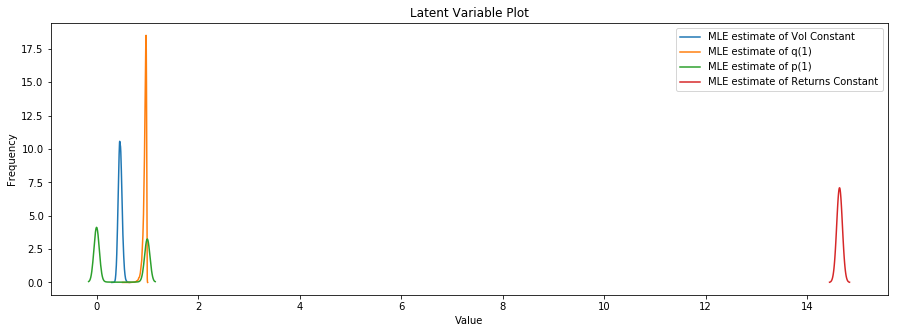

In [0]:
model.plot_z(figsize=(15,5))

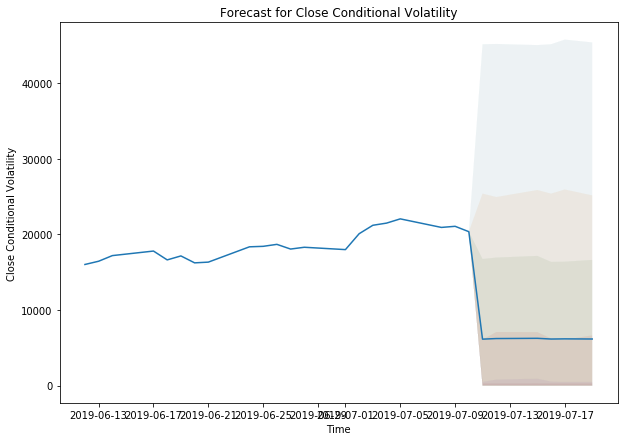

In [0]:
model.plot_predict(h=7)

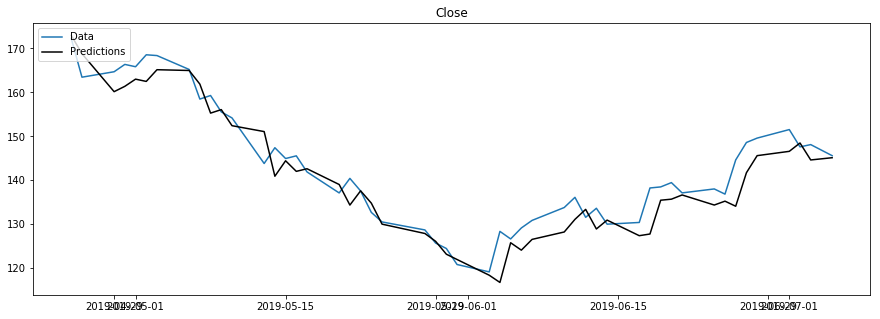

In [0]:
model.plot_predict_is(h=50,figsize=(15,5))

In [0]:
pred = model.predict(h=7)
pred

,Close
Date,
2019-07-10,20364.412236
2019-07-11,6158.680654
2019-07-12,6292.070565
2019-07-15,6260.152723
2019-07-16,6371.646832
2019-07-17,6233.423574
2019-07-19,6018.354017


## EGARCH (Exponential Generalized Autoregressive Conditional Heteroskedasticity)

In [0]:
model = pf.EGARCH(df, p=1, q=1)
x = model.fit()
x.summary()

EGARCH(1,1)                                                                                               
======================================================= ==================================================
Dependent Variable: Close                               Method: MLE                                       
Start Date: 2007-01-04 00:00:00                         Log Likelihood: -14810.5302                       
End Date: 2019-07-05 00:00:00                           AIC: 29631.0603                                   
Number of observations: 3147                            BIC: 29661.3313                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.1067     0.0126     8.4835   0.0      (0.0821 | 0.1314)        
p(1)                                 

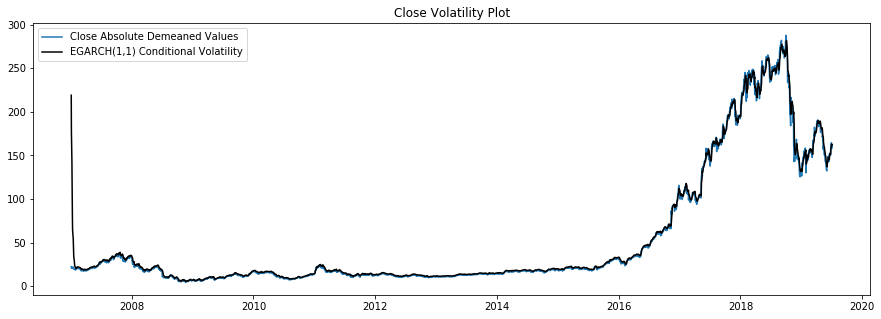

In [0]:
model.plot_fit(figsize=(15,5))

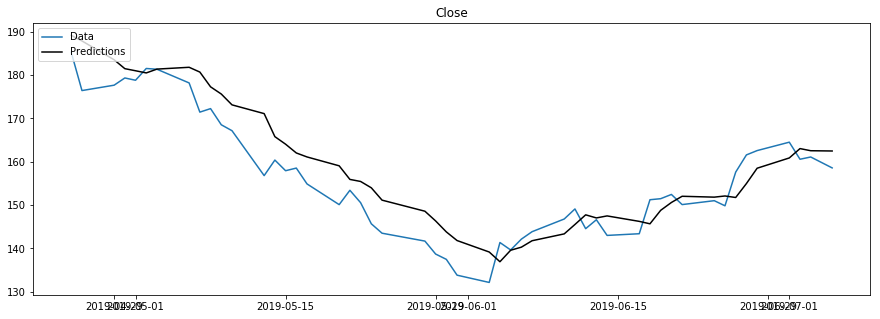

In [0]:
model.plot_predict_is(h=50,figsize=(15,5))

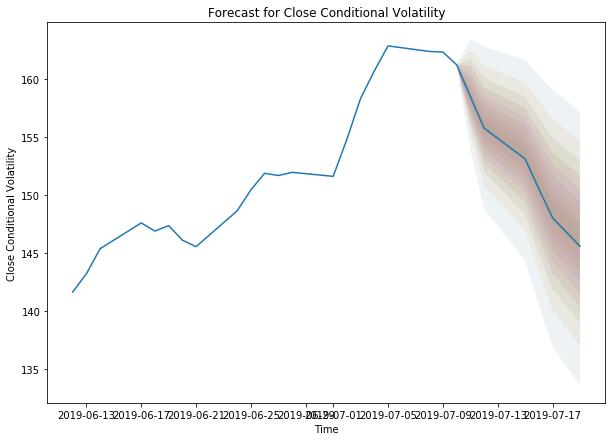

In [0]:
model.plot_predict(h=7)

In [0]:
pred = model.predict(h=7)
pred

,Close
Date,
2019-07-10,161.230527
2019-07-11,158.439057
2019-07-12,155.691906
2019-07-15,153.048026
2019-07-16,150.483446
2019-07-17,148.040293
2019-07-19,145.611531


## Beta-t-EGARCH LM (Beta t Exponential Generalized Autoregressive Conditional Heteroskedasticity Long Memory Models)

In [0]:
model = pf.LMEGARCH(df,p=1,q=1)
x = model.fit()
x.summary()

LMEGARCH(1,1)                                                                                             
======================================================= ==================================================
Dependent Variable: Close                               Method: MLE                                       
Start Date: 2007-01-04 00:00:00                         Log Likelihood: -11212.7412                       
End Date: 2019-07-05 00:00:00                           AIC: 22439.4825                                   
Number of observations: 3147                            BIC: 22481.8619                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             4.429      1.5618     2.8359   0.0046   (1.3679 | 7.4901)        
Component 1 p(1)                     

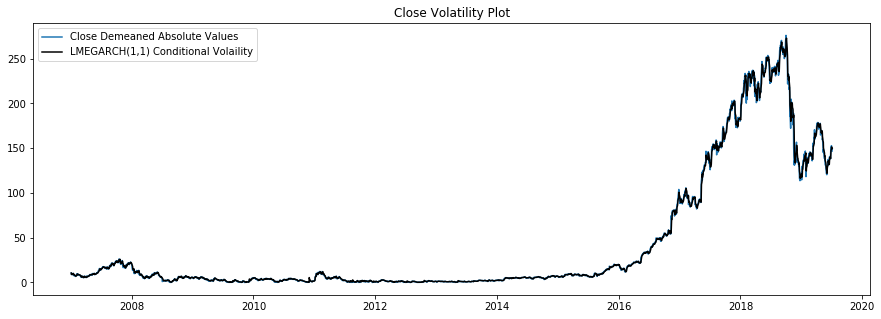

In [0]:
model.plot_fit(figsize=(15,5))

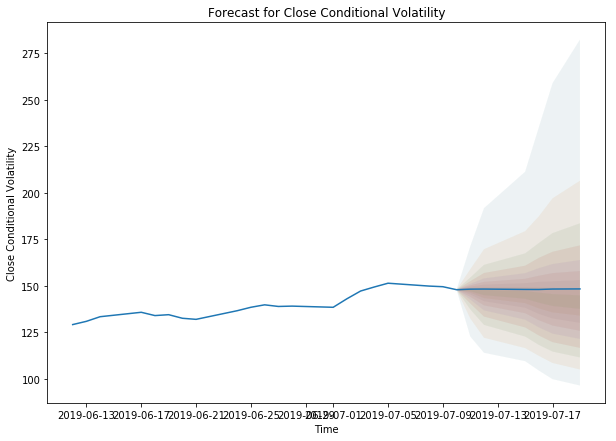

In [0]:
model.plot_predict(h=7)

In [0]:
pred = model.predict(h=7)
pred

,Close
Date,
2019-07-10,147.878015
2019-07-11,148.001944
2019-07-12,148.153984
2019-07-15,148.472112
2019-07-16,148.402985
2019-07-17,148.463373
2019-07-19,148.679363


## ARIMA (Auto Regressive Moving Average)

### Differencing the Time Series

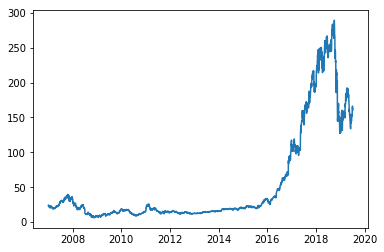

In [0]:
import numpy as np

ts = df['Close'] 
plt.plot(ts)
plt.show()
ts_log = np.log(ts)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,freq = 365)

In [0]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

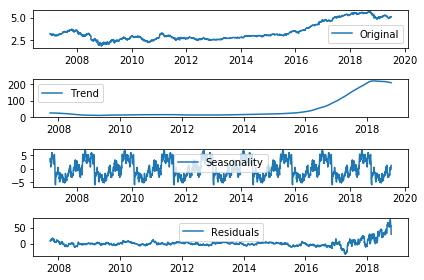

In [0]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

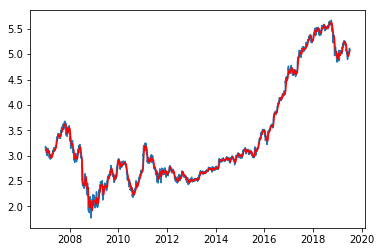

In [0]:
moving_avg = ts_log.rolling(window=12, center=False).mean()
rolstd = ts_log.rolling(window=12, center=False).std()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

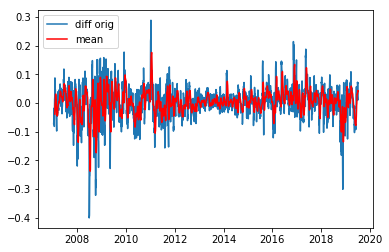

In [0]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)

moving_avg = ts_log_moving_avg_diff.rolling(window=12, center=False).mean()
rolstd = ts_log_moving_avg_diff.rolling(window=12, center=False).std()

plt.plot(ts_log_moving_avg_diff, label="diff orig")
plt.plot(moving_avg, color='red', label='mean')
plt.legend(loc='best')
plt.show()

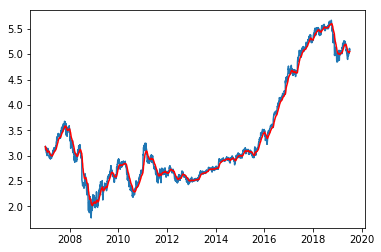

In [0]:
expwighted_avg = ts_log.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [0]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                    0.001149
p-value                           0.958627
#Lags Used                       10.000000
Number of Observations Used    3137.000000
Critical Value (1%)              -3.432436
Critical Value (5%)              -2.862462
Critical Value (10%)             -2.567261
dtype: float64


In [0]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts_log_moving_avg_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -9.889913e+00
p-value                        3.580714e-17
#Lags Used                     1.800000e+01
Number of Observations Used    3.118000e+03
Critical Value (1%)           -3.432449e+00
Critical Value (5%)           -2.862467e+00
Critical Value (10%)          -2.567264e+00
dtype: float64


In [0]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# seasonal difference
X = df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 165.089230
Day 2: 161.823204
Day 3: 162.453157
Day 4: 169.860727
Day 5: 174.164154
Day 6: 170.250218
Day 7: 173.401197


### Using Pyflux

In [0]:
model = pf.ARIMA(data=df, ar=4,ma=1, target='Close')
x = model.fit("MLE")
x.summary()

Normal ARIMA(4,0,1)                                                                                       
======================================================= ==================================================
Dependent Variable: Close                               Method: MLE                                       
Start Date: 2007-01-09 00:00:00                         Log Likelihood: -7231.4235                        
End Date: 2019-07-05 00:00:00                           AIC: 14476.847                                    
Number of observations: 3144                            BIC: 14519.2197                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0509     0.0487     1.0456   0.2957   (-0.0446 | 0.1464)       
AR(1)                                

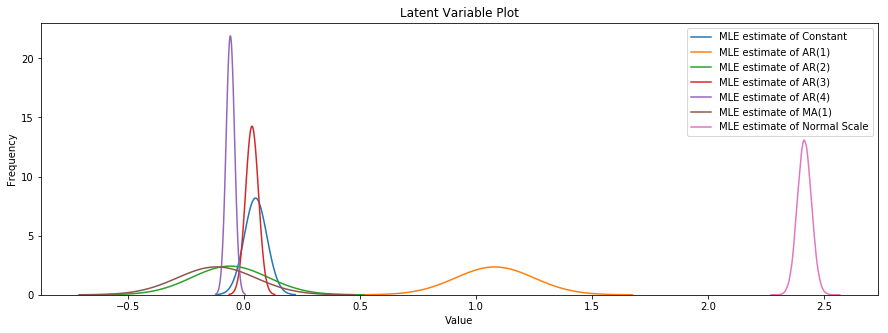

In [0]:
model.plot_z(figsize=(15,5))

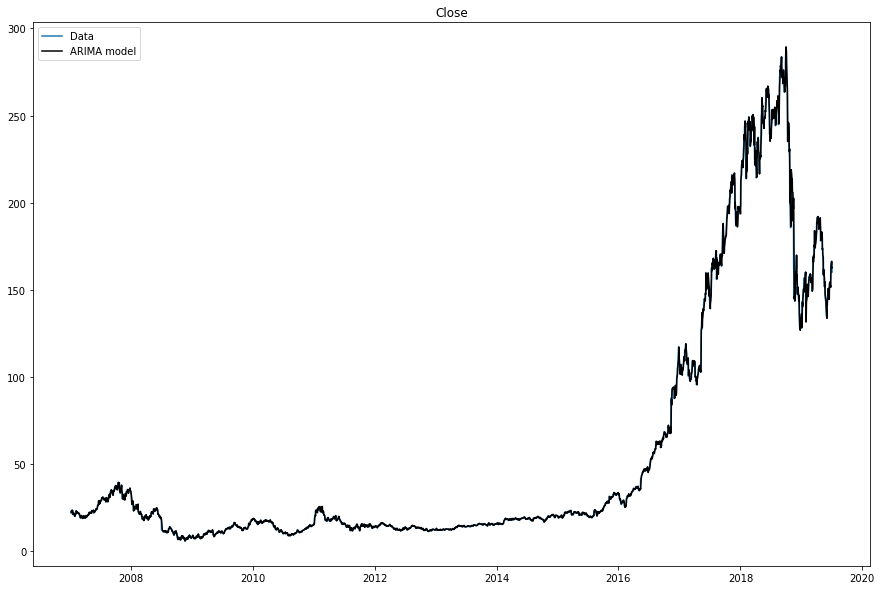

In [0]:
model.plot_fit(figsize=(15,10))

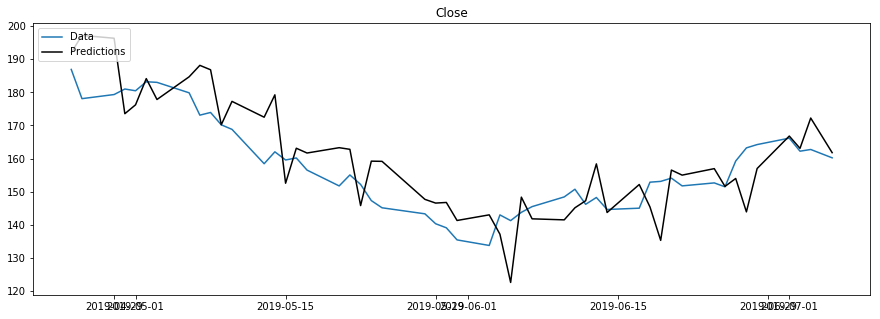

In [0]:
model.plot_predict_is(h=50, figsize=(15,5))

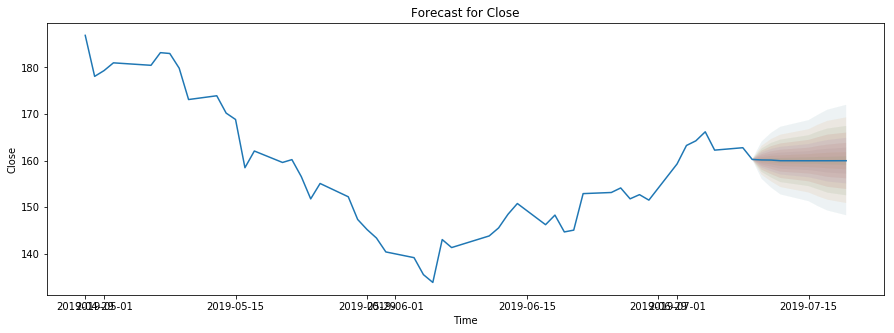

In [0]:
model.plot_predict(h=7,past_values=50,figsize=(15,5))

In [0]:
pred = model.predict(h=7)
pred

,Close
Date,
2019-07-10,160.120518
2019-07-11,160.094810
2019-07-12,159.953669
2019-07-15,159.943812
2019-07-16,159.946873
2019-07-17,159.947207
2019-07-19,159.955160


## VAR (Vector Auto Regressions)

In [0]:
model = pf.VAR(data=df, lags=1, integ=0)
x = model.fit()
x.summary()

VAR(1)                                                                                                    
======================================================= ==================================================
Dependent Variable: Close                               Method: OLS                                       
Start Date: 2007-01-04 00:00:00                         Log Likelihood: -7245.0372                        
End Date: 2019-07-05 00:00:00                           AIC: 14496.0745                                   
Number of observations: 3147                            BIC: 14514.2371                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Close Constant                           0.0569     0.0542     1.0501   0.2937   (-0.0493 | 0.163)        
Close AR(1)                          

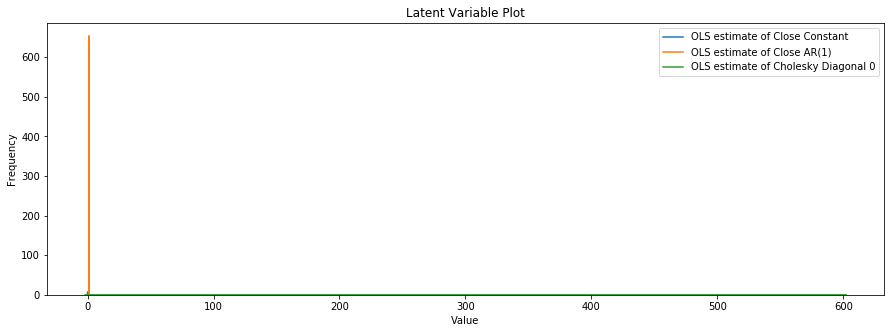

In [0]:
model.plot_z(list(range(0,6)),figsize=(15,5))

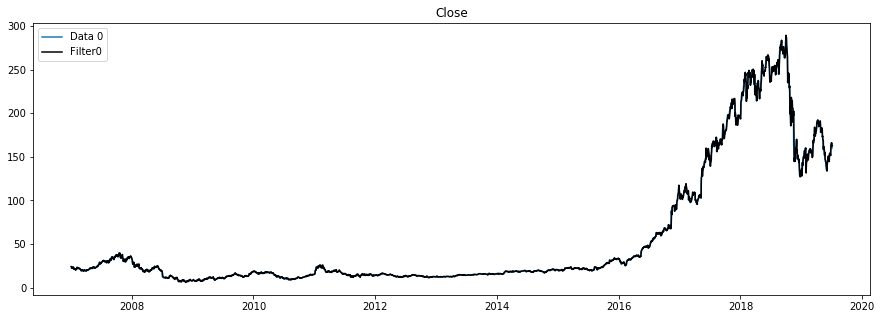

In [0]:
model.plot_fit(figsize=(15,5))

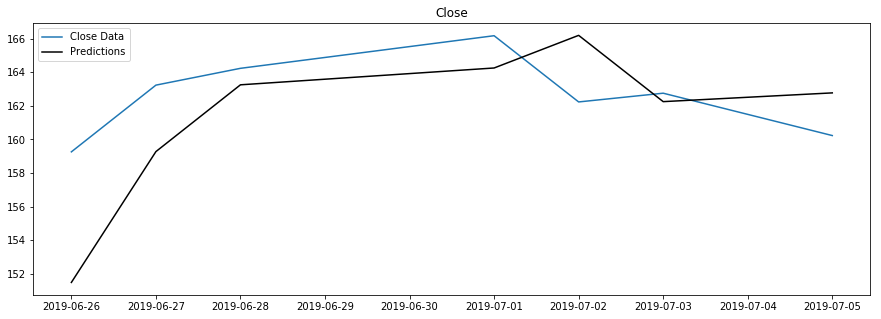

In [0]:
model.plot_predict_is(h=7, figsize=((15,5)))

In [0]:
pred = model.predict(h=7)
pred

,Close
Date,
2019-07-10,160.246305
2019-07-11,160.262610
2019-07-12,160.278910
2019-07-15,160.295207
2019-07-16,160.311500
2019-07-17,160.327788
2019-07-19,160.344072


## DAR (Dynamic Auto Regressions)

In [0]:
model = pf.DAR(data=df, ar=9, integ=0, target='Close')
x = model.fit("MLE")
x.summary()

DAR(9, integrated=0)                                                                                      
======================================================= ==================================================
Dependent Variable: Close                               Method: MLE                                       
Start Date: 2007-01-17 00:00:00                         Log Likelihood: 30425.4517                        
End Date: 2019-07-05 00:00:00                           AIC: -60828.9033                                  
Number of observations: 3139                            BIC: -60762.335                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        0.0602                                                           
Constant                             

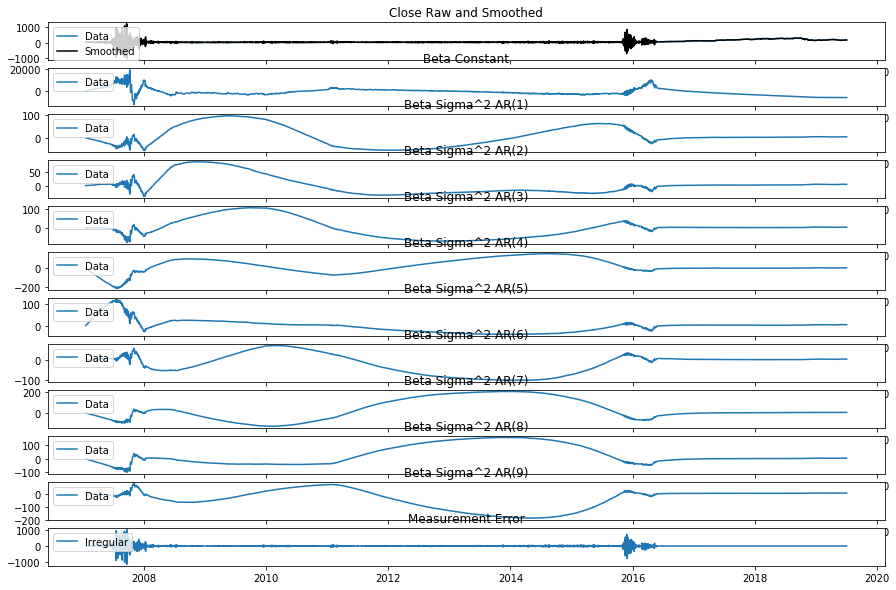

In [0]:
model.plot_fit(figsize=(15,10))

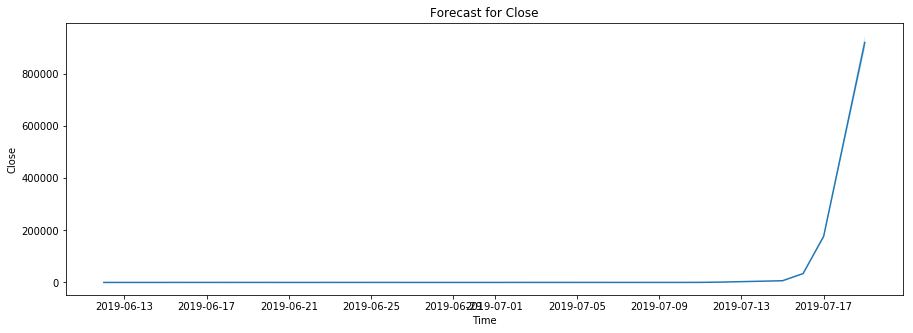

In [0]:
model.plot_predict(h=7, figsize=(15,5))

In [0]:
pred = model.predict(h=7)
pred

,Close
Date,
2019-07-10,199.177638
2019-07-11,393.829322
2019-07-12,1412.521145
2019-07-15,6682.899120
2019-07-16,34113.719671
2019-07-17,176952.497003
2019-07-19,920768.008599


## LSTM (Long Short Term Memory - RNN)

In [0]:
df = df.reset_index()
df.head(1)

,index,Date,Close
0,0,2007-01-03,234.029022


In [0]:
import numpy as np
X = df[["index"]]
y = df[["Close"]]

X = np.array(X)
y = np.array(y)

In [0]:
X.shape

(3148, 1, 1)

In [0]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
n_steps = 1
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=200, verbose=0)
x_input = array([3148])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[1083.7775]]


In [0]:
df.tail(1)

,index,Date,Close
3147,3147,2019-07-05,1132.670044


## Facebook's Prophet

In [0]:
df = df.reset_index()
df = df.rename(columns={"Date": "ds", "Close": "y"})

In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet()
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=60)
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


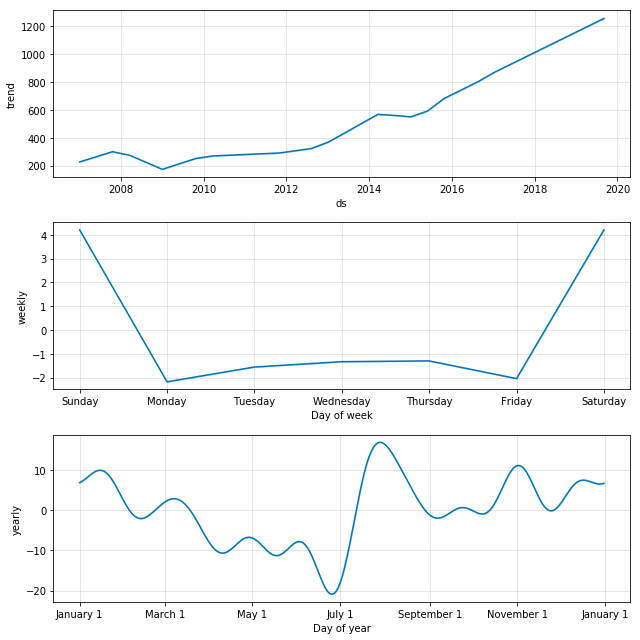

In [0]:
fig = m.plot_components(forecast)

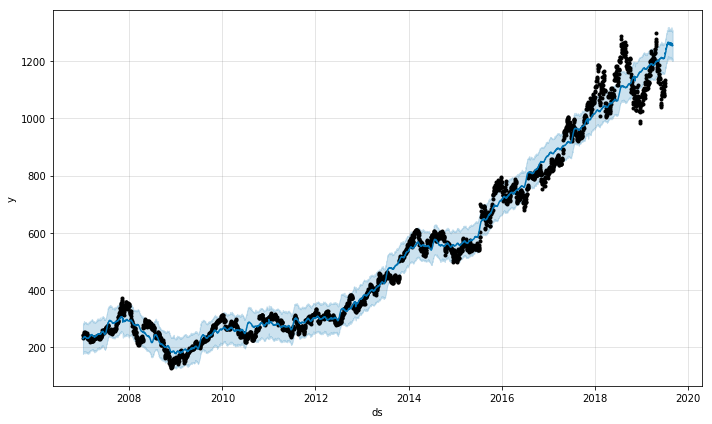

In [0]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [0]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-03,225.991598,157.873009,304.861562,225.991598,225.991598,6.183215,6.183215,6.183215,-1.099881,-1.099881,-1.099881,7.283096,7.283096,7.283096,0.0,0.0,0.0,232.174814
1,2007-01-04,226.245851,158.092459,312.324897,226.245851,226.245851,6.436843,6.436843,6.436843,-1.068302,-1.068302,-1.068302,7.505145,7.505145,7.505145,0.0,0.0,0.0,232.682693
2,2007-01-05,226.500103,151.224140,304.597332,226.500103,226.500103,5.948133,5.948133,5.948133,-1.803299,-1.803299,-1.803299,7.751432,7.751432,7.751432,0.0,0.0,0.0,232.448236
3,2007-01-08,227.262861,154.236398,312.255013,227.262861,227.262861,6.568138,6.568138,6.568138,-1.997069,-1.997069,-1.997069,8.565208,8.565208,8.565208,0.0,0.0,0.0,233.831000
4,2007-01-09,227.517114,151.896646,311.817116,227.517114,227.517114,7.505903,7.505903,7.505903,-1.328507,-1.328507,-1.328507,8.834409,8.834409,8.834409,0.0,0.0,0.0,235.023016


In [0]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 20 forecasts with cutoffs between 2009-02-22 00:00:00 and 2018-07-05 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-02-23,167.021491,156.274338,179.034223,165.195190,2009-02-22
1,2009-02-24,168.249882,156.708836,179.849616,172.897903,2009-02-22
2,2009-02-25,167.772060,156.518332,179.756806,170.990997,2009-02-22
3,2009-02-26,166.124041,154.788168,177.433418,168.758759,2009-02-22
4,2009-02-27,165.090707,154.293485,176.705929,169.164169,2009-02-22


In [0]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,2654.276449,51.519671,38.108130,0.067779,0.461386
1,38 days,2664.213979,51.616024,38.294923,0.068490,0.457540
2,39 days,2681.497724,51.783180,38.533218,0.069001,0.453280
3,40 days,2691.024567,51.875086,38.595700,0.069217,0.457654
4,41 days,2698.511784,51.947202,38.708917,0.069473,0.456262


## Gluon Time Series

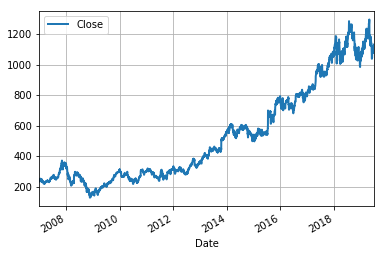

In [0]:
import matplotlib.pyplot as plt
df.plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [0]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.Close[:"2019-06-27 00:00:00"]}],
    freq = "1440min"
)

In [0]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="1440min", prediction_length=7, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 21.88it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[0] Elapsed time 2.291 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=5.377945
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.04it/s, avg_epoch_loss=4.45]
INFO:root:Epoch[1] Elapsed time 2.082 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.451150
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.12it/s, avg_epoch_loss=4.41]
INFO:root:Epoch[2] Elapsed time 2.078 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.407903
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 24.04it/s, avg_epoch_loss=4.23]
INFO:root:Epoch[3] Elapsed time 2.085 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.230802
INFO:root:Epoch[4] Learning rate is 0.001


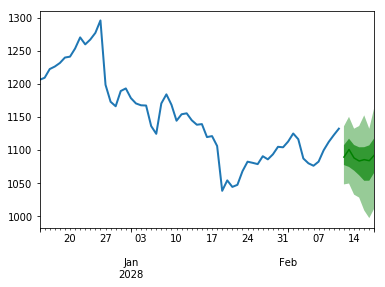

In [0]:
test_data = ListDataset(
    [{"start": df.index[3144], "target": df.Close[:"2019-07-05 00:00:00"]}],
    freq = "1440min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])

In [0]:
forecast.mean

array([1092.9272, 1099.5981, 1087.8707, 1083.4   , 1082.7875, 1080.3273,
       1093.2021], dtype=float32)